# Latent Dirichlet Allocation (Discrete)
# Gaussian Mixture Models (Continuous)

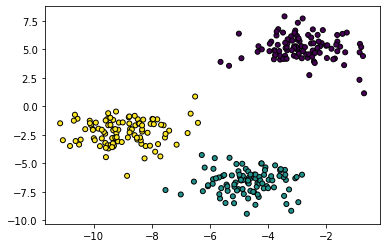

In [10]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=300, n_features=2, centers=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y, s=25, edgecolor='k') #c=Y changes color based on label
plt.show()


[[-0.79657054  1.71417579]
 [-4.69741961 -6.6119144 ]
 [-2.81741171  5.24727605]
 [-8.98569096 -2.2651699 ]
 [-5.43596215  3.75599542]
 [-5.50485586 -1.24015362]
 [-5.50485586 -1.24015362]
 [-5.50485586 -1.24015362]
 [-5.50485586 -1.24015362]
 [-5.50485586 -1.24015362]]


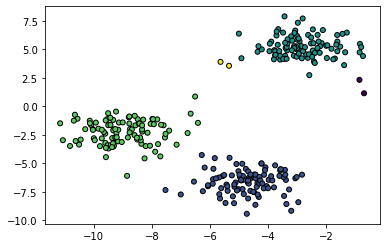

In [21]:
# n_components is a maximum. The means of unneeded groups are the same.
dpgmm = BayesianGaussianMixture(n_components=10, weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(2),
    init_params="random", max_iter=100, random_state=2)
#print(dpgmm.get_params())
labels = dpgmm.fit_predict(X)
print(dpgmm.means_)
#print(dpgmm.covariances_)
#print(labels)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=labels, s=25, edgecolor='k') #c=Y changes color based on label
plt.show()

# Outliers and Uncertainties

In [23]:
from scipy.stats import entropy

# We can identify ambiguous points by measuring the entropy of the posterior probability assignment.
# Incidentally, these are good candidates for labeling in a classification setting.
probs = dpgmm.predict_proba(X)
print(probs[:10])
entropies = [entropy(weights) for weights in probs]
print(entropies[:10])

[[1.40850005e-038 8.37764101e-008 2.19748296e-019 9.99999916e-001
  8.57231145e-024 8.56013588e-092 3.18443558e-135 1.18463423e-178
  4.40692934e-222 1.63941120e-265]
 [9.54062877e-008 1.82615784e-027 9.99999888e-001 3.72410973e-016
  1.67512145e-008 7.46449021e-107 2.77684707e-150 1.03300821e-193
  3.84286902e-237 1.42957647e-280]
 [2.39300033e-071 5.55679166e-007 8.50102998e-038 9.99999444e-001
  1.86738501e-056 5.16590614e-101 1.92175633e-144 7.14907957e-188
  2.65951192e-231 9.89358639e-275]
 [2.77846764e-012 8.82548050e-039 1.00000000e+000 7.54667991e-024
  6.60381134e-017 1.04444711e-120 3.88542260e-164 1.44540673e-207
  5.37702285e-251 2.00029335e-294]
 [1.35371470e-011 3.86713811e-034 1.00000000e+000 7.21601812e-020
  5.76928540e-011 4.65847317e-114 1.73298741e-157 6.44684485e-201
  2.39827526e-244 8.92176619e-288]
 [2.25851036e-015 1.53863162e-028 9.97969899e-001 2.84812968e-013
  2.03010070e-003 5.04833628e-106 1.87801945e-149 6.98637505e-193
  2.59898460e-236 9.66842016e-280

# Assignment:
1. Sort and plot the max probabilities (probability of the group it is assigned to) for all points.
2. Sort and plot the entropies of all the points. Determine a cutoff for likely outliers.
3. Plot the points that you have identified as outliers (perhaps against the rest of the dataset). Does this agree with your intuition?
4. Identify groups whose only points are outliers.

# Stretch Goals:
- How does the number of outliers change as we adjust model parameters such as maximum number of groups or the weight concentration prior. Plot the results.
- Create a dataset with some true data, and some outliers. Can you correctly identify the outliers.